In [32]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.model_selection import cross_val_score

# Load data
data = pd.read_csv('../data/training_set_prepped.csv')
test_set = pd.read_csv('../data/test_set_prepped.csv')

# Split the data into features and target
X = data.drop('price', axis=1)
y = data['price']

# Define the model
rf = RandomForestRegressor()


## Define the K-fold cross validator
kfold = KFold(n_splits=5, shuffle=True, random_state=42)


param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the random forest
   'max_features': ['auto', 'sqrt'],  # Number of features to consider at every split
    'max_depth': [10, 20, 30],         # Maximum number of levels in tree
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],     # Minimum number of samples required at each leaf node
    'bootstrap': [True, False]         # Method of selecting samples for training each tree
}


'''
#Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=kfold, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

#Fit the grid search to the data
grid_search.fit(X, y)

## Best parameters found
best_params = grid_search.best_params_

## Best estimator with the optimal settings
best_rf = grid_search.best_estimator_
'''

"\n#Create the GridSearchCV object\ngrid_search = GridSearchCV(estimator=rf, param_grid=param_grid, \n                           cv=kfold, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')\n\n#Fit the grid search to the data\ngrid_search.fit(X, y)\n\n## Best parameters found\nbest_params = grid_search.best_params_\n\n## Best estimator with the optimal settings\nbest_rf = grid_search.best_estimator_\n"

In [22]:

#Best parameters found:
best_parameters2 = {'bootstrap': False,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 300}

new_best_parameters = {'bootstrap': False,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 300}

 #Best estimator with the optimal settings
best_rf = RandomForestRegressor(bootstrap=False, max_depth=20, max_features='sqrt',
                      min_samples_split=5, n_estimators=300, min_samples_leaf=2)   


best_rf.fit(X, y)

RandomForestRegressor(bootstrap=False, max_depth=20, max_features='sqrt',
                      min_samples_leaf=2, min_samples_split=5,
                      n_estimators=300)

In [23]:
# Predict the prices of the test_set
temp = test_set.drop('price', axis=1)
test_set['price_predicted'] = best_rf.predict(temp)

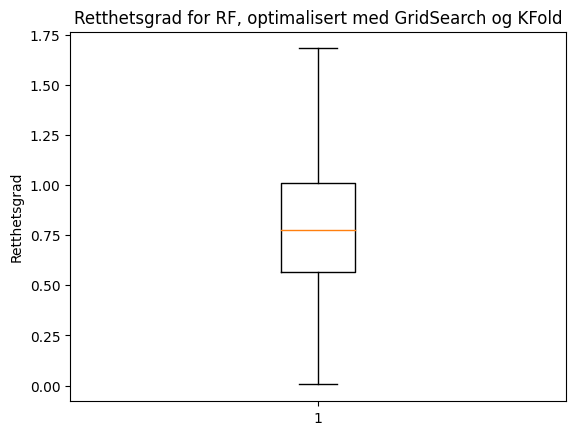

In [24]:
# create a boxplot of the predicted prices divided by the actual prices
plt.boxplot((2**test_set['price_predicted'])/(test_set['price']), showfliers=False)
plt.ylabel('Retthetsgrad')
plt.title('Retthetsgrad for RF, optimalisert med GridSearch og KFold')
plt.show()

In [25]:
best_params

{'bootstrap': False,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 300}

In [8]:
best_parameters2

{'bootstrap': False,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 300}

### Comparing neg_mean_squared_error scores for random forest with a baseline model which always predicts the mean to confirm its validity

In [44]:
class MeanRegressor(BaseEstimator, RegressorMixin):
    def fit(self, X, y):
        self.mean_ = np.mean(y)
        return self

    def predict(self, X):
        return np.full(shape=(len(X),), fill_value=self.mean_)

In [45]:
mean_regressor = MeanRegressor()
scores = cross_val_score(mean_regressor, X, y, cv=5, scoring='neg_mean_squared_error')


mse_scores = scores


In [46]:
mean_mse = mse_scores.mean()
std_mse = mse_scores.std()

print(f"Mean MSE across the folds: {mean_mse}")
print(f"Standard deviation of MSE across the folds: {std_mse}")

Mean MSE across the folds: -0.8530395873993097
Standard deviation of MSE across the folds: 0.13733419561568339
